In [3]:
import numpy as np 
from scipy.integrate import odeint 
from numba import njit
import timeit
import matplotlib.pyplot as plt
import numpy.fft as fft
import math
import peakutils

In [6]:
@njit
def oscillatorModelOde(Y, t, can): 

    y = can[-1]
    

    ka1 = can[0]
    kb1 = can[1]
    kcat1 = can[2]

    ka2 = can[3]
    kb2 = can[4]

    ka3 = can[5]
    kb3 = can[6]

    ka4 = can[7]
    kb4 = can[8]

    ka7 = can[9]
    kb7 = can[10]
    kcat7 = can[11]

    ka1i = can[12]
    kb1i = can[13]

    ka2i = can[14]
    kb2i = can[15]

    ka3i = can[16]
    kb3i = can[17]

    ka4i = can[18]
    kb4i = can[19]

    ka7i = can[20]
    kb7i = can[21]

    ka1y = can[22]
    kb1y = can[23]

    ka2y = can[24]
    kb2y = can[25]

    ka3y = can[26]
    kb3y = can[27]

    ka4y = can[28]
    kb4y = can[29]

    ka7y = can[30]
    kb7y = can[31]




    #initial conditions
    L = Y[0]   # make sure in uM
    Lp = Y[1]
    K = Y[2]
    P = Y[3]
    A = Y[4]
    LK = Y[5]
    LpA = Y[6] 
    LpAK = Y[7] 
    LpAP = Y[8] 
    LpAPLp = Y[9]
    LpAKL = Y[10] 
    LpP = Y[11] 
    AK = Y[12]
    AKL = Y[13]
    AP = Y[14]
    APLp = Y[15]


    dL = kb1i*AKL + kcat7*APLp + kb1*LK + kb1y*LpAKL + kcat7*LpAPLp + kcat7*LpP - ka1i*AK*L - ka1*K*L - ka1y*y*L*LpAK
    dLp = kcat1*AKL + kb7i*APLp + kcat1*LK + kb2*LpA + kb2i*LpAK + kb2y*LpAKL + kcat1*LpAKL + kb2i*LpAP + kb2y*LpAPLp + kb7y*LpAPLp + kb7*LpP - ka2*A*Lp - ka2i*AK*Lp - ka2i*AP*Lp - ka7i*AP*Lp - ka7*Lp*P - ka2y*y*AKL*Lp - ka2y*y*APLp*Lp - ka7y*y*Lp*LpAP
    dK = kb1*LK + kb3*LpAK + kb3i*AK + kcat1*LK - ka3i*A*K - ka1*K*L - ka3*K*LpA
    dP = kb4i*AP + kb4*LpAP + kb7*LpP + kcat7*LpP - ka4i*A*P - ka7*Lp*P - ka4*LpA*P
    dA = kb3*AKL + kb2*LpA + kb3i*AK + kb4*APLp + kb4i*AP - ka3i*A*K - ka2*A*Lp - ka3*A*LK - ka4*A*LpP - ka4i*A*P
    dLK = kb3*AKL + kb3y*LpAKL + ka1*K*L - kb1*LK - kcat1*LK - ka3*A*LK - ka3y*y*LK*LpA
    dLpA = kb3*LpAK + kb3y*LpAKL + kb4*LpAP + kb4y*LpAPLp + ka2*A*Lp - kb2*LpA - ka3*K*LpA - ka4*LpA*P - ka3y*y*LK*LpA - ka4y*y*LpA*LpP
    dLpAK = kb1y*LpAKL + kcat1*LpAKL + ka2i*AK*Lp + ka3*K*LpA - kb2i*LpAK - kb3*LpAK - ka1y*y*L*LpAK
    dLpAP = kb7y*LpAPLp + kcat7*LpAPLp + ka2i*AP*Lp + ka4*LpA*P - kb2i*LpAP - kb4*LpAP - ka7y*y*Lp*LpAP
    dLpAPLp = ka2y*y*APLp*Lp + ka7y*y*Lp*LpAP + ka4y*y*LpA*LpP - kb2y*LpAPLp - kb4y*LpAPLp - kb7y*LpAPLp - kcat7*LpAPLp
    dLpAKL = ka2y*y*AKL*Lp + ka3y*y*LK*LpA + ka1y*y*L*LpAK - kb1y*LpAKL - kb2y*LpAKL - kb3y*LpAKL - kcat1*LpAKL
    dLpP = kb4*APLp + kb4y*LpAPLp + ka7*Lp*P - kb7*LpP - kcat7*LpP - ka4*A*LpP - ka4y*y*LpA*LpP
    dAK = kb1i*AKL + kb2i*LpAK + kcat1*AKL + ka3i*A*K - kb3i*AK - ka1i*AK*L - ka2i*AK*Lp
    dAKL = kb2y*LpAKL + ka1i*AK*L + ka3*A*LK - kb1i*AKL - kb3*AKL - kcat1*AKL - ka2y*y*AKL*Lp
    dAP = kb7i*APLp + kcat7*APLp + kb2i*LpAP + ka4i*A*P - kb4i*AP - ka2i*AP*Lp - ka7i*AP*Lp
    dAPLp = kb2y*LpAPLp + ka7i*AP*Lp + ka4*A*LpP - kb4*APLp - kb7i*APLp - kcat7*APLp - ka2y*y*APLp*Lp


    return([dL, dLp, dK, dP, dA, dLK, dLpA, dLpAK, dLpAP, dLpAPLp, dLpAKL, dLpP, dAK, dAKL, dAP, dAPLp])	

In [4]:
t = np.linspace(0, 100, 10000)
Y0 = np.array([0,3.,1.,0.8,2,0,0,0,0,0,0,0,0,0,0,0])
input = {'ka1': 0.001, 'kb1': 0.016466893897328572, 'kcat1': 5.138028633784708, 'ka2': 15.262883943812058, 'kb2': 1.7044137475243337, 'ka3': 0.001, 'kb3': 0.002859269208069338, 'ka4': 0.004192560991030677, 'kb4': 0.14259322541376293, 'ka7': 0.13867125186434642, 'kb7': 0.005535045570509145, 'kcat7': 0.857806952449775, 'VA': 10000.0}
can = np.array([x for x in input.values()])

In [9]:
def calc_D(product):
    # Define a dictionary of diffusion constants for each of the substrates
    Ddict = {"L": [0.5,0.5,0.0], "K": [25.0,25.0,25.0], "P": [25.0,25.0,25.0], "A": [25.0,25.0,25.0]}
    # Filter out the "p" character and split the product string into individual characters
    substrings = [c for c in product if c != "p"]

    # Initialize a list to store the average diffusion constants
    avg_Ds = []

    # Loop over the substrings and compute the average diffusion constant for each one
    for substring in substrings:
        # Use the substring as a key to access the diffusion constant value in the Ddict dictionary
        Dvals = Ddict[substring]

        # Compute the average diffusion constant over the x, y, and z directions
        avg_D = sum(Dvals) / 3

        # Append the average diffusion constant to the list
        avg_Ds.append(avg_D)

    # Compute the average relative diffusion constant over all the substrings
    avg_rel_D = sum(avg_Ds) / len(avg_Ds)

    # Return the result
    return avg_rel_D


In [ ]:
def convert_constants(input_arr, Darray):
    output_arr = np.zeros(3*len(input_arr)//2 + 3)
    output_arr[::3] = input_arr[::2]  # copy ka constants as-is
    kcat_indices = [2, 5, 7, 10]
    output_arr[kcat_indices] = input_arr[kcat_indices]  # copy kcat constants as-is

    for i, ka in enumerate(input_arr[::2]):
        ka_y = convert_ka(ka, Darray[i])
        ka_i = convert_ka(ka, 1/Darray[i])
        output_arr[3*i + 1] = ka_y
        output_arr[3*i + 2] = ka_i

    kb_dict = {1: (2, 0), 2: (5, 3), 3: (7, 6), 4: (9, 8), 7: (12, 11)}
    for i, (kb_index, ka_index) in kb_dict.items():
        kb = input_arr[kb_index]
        ka = output_arr[3*ka_index]
        kb_y = convert_kb(kb, ka, input_arr[2*i-1])
        kb_i = convert_kb(kb, ka, input_arr[2*i])
        output_arr[3*i] = kb
        output_arr[3*i + 1] = kb_y
        output_arr[3*i + 2] = kb_i

    return output_arr


In [5]:
rxn_map = {"LK": [0,1], "LpA": [3,4], "LpAK": [5,6], "LpAP": [7,8], "LpP": [9,10], "AKL": [12,13], "LpAK": [14,15], "AK": [16,17], ""}

array([1.00000000e-03, 1.64668939e-02, 5.13802863e+00, 1.52628839e+01,
       1.70441375e+00, 1.00000000e-03, 2.85926921e-03, 4.19256099e-03,
       1.42593225e-01, 1.38671252e-01, 5.53504557e-03, 8.57806952e-01,
       1.00000000e+04])

In [45]:
def getFrequencies(y):
    T = 100 #seconds
    dt = 0.01 #seconds
    #fft sample rate: 1 sample per 5 minutes 
    res = abs(fft.rfft(y))
    #normalize the amplitudes 
    res = res/math.ceil((T/dt)/2) 
    return res

In [47]:
sol = odeint(oscillatorModelOdeNumba, Y0, t, args=(can,))
fftData = getFrequencies(sol[:,0])
fftData


array([3.25234087e+00, 5.10306209e-01, 8.65319522e-01, ...,
       6.14393562e-05, 6.14393474e-05, 6.14393436e-05])

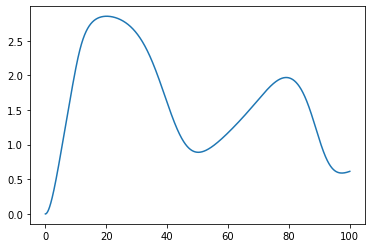

In [34]:
plt.plot(t, sol[:,0])

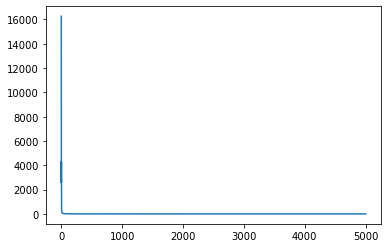

In [44]:
#plot the frequencies
plt.plot(fftData)

In [50]:
indexes = peakutils.indexes(fftData, thres=0.02, min_dist=1, thres_abs = False) 
indexes

array([2])

In [55]:
def getDif(indexes, arrayData):	
    arrLen = len(indexes)
    sum = 0
    for i, ind in enumerate(indexes):
        if i == arrLen - 1:
            break
        sum += arrayData[ind] - arrayData[indexes[i + 1]]
        
    #add last peak - same as substracting it from zero 
    sum += arrayData[indexes[-1]]  
    return sum   
    
#gets standard deviation 
def getSTD(indexes, arrayData, window):
    numPeaks = len(indexes)
    arrLen = len(arrayData)
    sum = 0
    for ind in indexes:
        minInd = max(0, ind - window)
        maxInd = min(arrLen, ind + window)
        sum += np.std(arrayData[minInd:maxInd])  
        
    sum = sum/numPeaks 	
    return sum	 

def getFrequencies(y):
    T = 100 #seconds
    dt = 0.01 #seconds
    #fft sample rate: 1 sample per 5 minutes 
    res = abs(fft.rfft(y))
    #normalize the amplitudes 
    res = res/math.ceil((T/dt)/2) 
    return res

def costTwo(Y): #Y is a 2D solution array with the time series of the variables from odeint
    p1 = Y[:,6] 
    fftData = getFrequencies(p1)      

    indexes = peakutils.indexes(fftData, thres=0.02, min_dist=1, thres_abs = False) 

    #in case of no oscillations return 0 
    if len(indexes) == 0: 
        return 0.,  		
    std = getSTD(indexes, fftData, 1)  
 
    diff = getDif(indexes, fftData)  
   
    cost = std + diff 
  
    return cost,

In [56]:
costTwo(sol)

<class 'numpy.float64'>
<class 'numpy.float64'>


(0.7308849523244785,)

In [58]:
peakutils.indexes(sol[:,0], thres=0.02, min_dist=1, thres_abs = False)

array([2012, 7910])